### Name :- Pranit Dutta

### CWID :- 20010681

### Problem 2

In [457]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, accuracy_score

In [458]:
data=pd.read_csv("wdbc.data",names=['id', 'type', 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension'])

In [459]:
data=data.drop(['id'],axis=1)

In [460]:
data['type'] = data['type'].replace(['M','B'],[0,1])

In [461]:
X=data.drop(['type'], axis = 1)
y=data['type'].values

In [462]:
X=(X - np.min(X))/(np.max(X) - np.min(X)).values

In [463]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [464]:
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

In [465]:
def compute_costNgradients(w, b, x, y):
    
    z = np.dot(w.T, x) + b 
    y_hat = 1/(1 + np.exp(-z))
    loss = -np.mean(y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))
    cost = (np.sum(loss)) / x.shape[1] 
    
    # backpropagation
    derivative_weight = (np.dot(x, ((y_hat - y).T))) / x.shape[1]
    derivative_bias = np.sum(y_hat-y) / x.shape[1]                
    gradients = {"weight": derivative_weight,
                 "bias": derivative_bias}
    return cost, gradients

In [466]:
def SGD(w, b, x_train, y_train, learning_rate, epoch):
    cost_list = []
    index = []
 
    for i in range(epoch):
        # make forward and backward propagation and find cost and gradients
        cost, gradients = compute_costNgradients(w, b, x_train, y_train)
        cost_list.append(cost)
        w = w - learning_rate * gradients["weight"]
        b = b - learning_rate * gradients["bias"]
        index.append(i)
        
    parameters = {"weight": w, "bias": b}
    plt.plot(index, cost_list)
    plt.xticks(index, rotation ='vertical')
    plt.xlabel("epoch")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [467]:
def predict(w, b, x):
    # x_test is a input for forward propagation
    z = 1/(1 + np.exp(-(np.dot(w.T, x)+b)))
    Y_prediction = np.zeros((1, x.shape[1]))
    for i in range(z.shape[1]):
        if z[0, i]<= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
 
    return Y_prediction

In [468]:
def logistic_regression(w,b,x_train, y_train, x_test, y_test,learning_rate,  epoch):
 
    
    
    parameters, gradients, cost_list = SGD(w, b, x_train, y_train, learning_rate, epoch)
     
    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)
    y_prediction_train = predict(parameters["weight"], parameters["bias"], x_train)
 
    # train / test Errors
    print("train accuracy: {} %".format(
        100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(
        100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return(y_prediction_test,y_prediction_train)

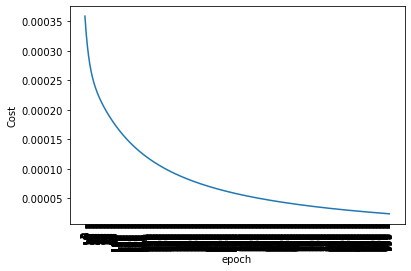

train accuracy: 94.72527472527473 %
test accuracy: 93.85964912280701 %


In [469]:
dimension = x_train.shape[0]
w = np.full((dimension, 1),0)
b = 0.0
y_prediction_test,y_prediction_train= logistic_regression(w,b,x_train, y_train, x_test, y_test, learning_rate = 0.09, epoch = 1000)

For batch size: 100.000000  - 


<ipython-input-465-692a40212bba>:5: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))
<ipython-input-465-692a40212bba>:5: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))


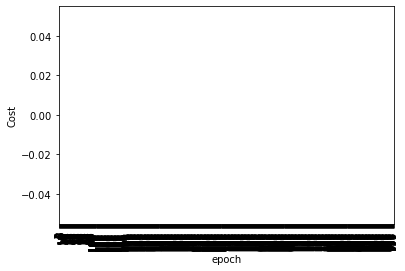

train accuracy: 90.76923076923077 %
test accuracy: 92.10526315789474 %
For batch size: 500.000000  - 


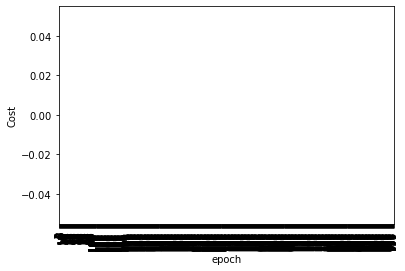

train accuracy: 61.75824175824176 %
test accuracy: 66.66666666666667 %
For batch size: 1000.000000  - 


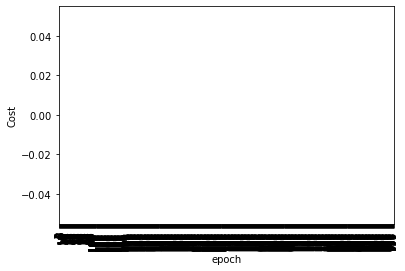

train accuracy: 61.75824175824176 %
test accuracy: 66.66666666666667 %


In [470]:
for batch_size in [100,500,1000]:
        dimension=x_train.shape[0]
        print("For batch size: %f  - " % batch_size)
        w = np.full((dimension, 1), 0.0)
        w = logistic_regression(w,batch_size,x_train, y_train,x_test, y_test, learning_rate = 0.09, epoch = 1000)